In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imutils
from imutils import paths
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
import random
import pickle
import csv
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import scipy
from sklearn.cluster import KMeans
from PIL import Image
from skimage.morphology import disk, opening
from pylab import *

In [2]:
path1 = '/home/src21/Documents/full_view/20211002_172036A.jpg'
img = cv2.imread(path1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.bilateralFilter(gray, 5, 75, 75)
kernel_sharp = np.array((
         [-2, -2, -2],
         [-2, 17, -2],
         [-2, -2, -2]), dtype='int')
sharpened_img = cv2.filter2D(blur, -1, kernel_sharp)

/home/src21/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  # Remove the CWD from sys.path while we load stuff.


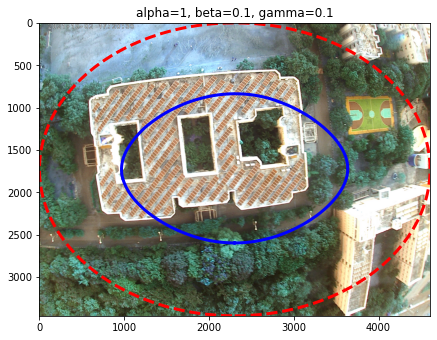

In [12]:
##
s = np.linspace(0, 2*np.pi, 1000)
r = (img.shape[1]/2) + (img.shape[1]/2)*np.sin(s)
c = (img.shape[0]/2) + (img.shape[0]/2)*np.cos(s)
# r = np.linspace(0, img.shape[1], 1000)
# c = np.linspace(0, img.shape[0], 1000)
init = np.array([r, c]).T

snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),
                       init, alpha=0.25, beta=0.01, gamma=0.01, max_iterations=1000)
# snake = active_contour(sharpened_img, init, alpha=4.115, beta=0.111, gamma=0.001, max_iterations=500)

##
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.set_title('alpha=1, beta=0.1, gamma=0.1')
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
# plt.imshow(img, cmap='gray')
plt.show()



# snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),
#                        init, alpha=0.215, beta=0.1, gamma=0.001)

# ##
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot(111)
# plt.gray()
# ax.imshow(img)
# ax.set_title('alpha=0.215, beta=0.1 gamma=0.001')
# ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
# ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# # ax.set_xticks([]), ax.set_yticks([])
# ax.axis([0, img.shape[1], img.shape[0], 0])
# # plt.imshow(img, cmap='gray')
# plt.show()


# snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),
#                        init, alpha=1.215, beta=0.001, gamma=0.01)
# ##
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot(111)
# plt.gray()
# ax.imshow(img)
# ax.set_title('alpha=1.215, beta=0.001 gamma=0.01')
# ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
# ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# # ax.set_xticks([]), ax.set_yticks([])
# ax.axis([0, img.shape[1], img.shape[0], 0])
# # plt.imshow(img, cmap='gray')
# plt.show()


# snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),
#                        init, alpha=0.215, beta=0.001, gamma=0.1)
# ##
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot(111)
# plt.gray()
# ax.imshow(img)
# ax.set_title('alpha=0.215, beta=0.001 gamma=0.1')
# ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
# ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# # ax.set_xticks([]), ax.set_yticks([])
# ax.axis([0, img.shape[1], img.shape[0], 0])
# # plt.imshow(img, cmap='gray')
# plt.show()